In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', 400)

In [3]:
%load_ext autoreload
%autoreload 2

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Offline tasks

# Automated

## Batch
This need to be done offline, before running the webapp

In [4]:
LIST_CITY

['toronto', 'new_york']

In [5]:
for city_file_name in LIST_CITY_DATA_FILE_NAME:
    prepare_app_data_from_raw_data(city_file_name, return_app_data=False)

## Runtime
all below func are part of web app

### first input

In [6]:
SOURCE_CITY = 'toronto'
DEST_CITY = 'new_york'

SOURCE_VENUE = 'Harbourfront East, Union Station, Toronto Islands'  # 'Agincourt'

In [7]:
file_name = [i for i in LIST_CITY_DATA_FILE_NAME if SOURCE_CITY in i][0]
X_source = read_data_file(file_name=file_name, data_type='artifact_app')

file_name = [i for i in LIST_CITY_DATA_FILE_NAME if DEST_CITY in i][0]
X_dest = read_data_file(file_name=file_name, data_type='artifact_app')

print(X_source.shape, X_dest.shape)

(96, 273) (95, 271)


In [21]:
source_name = SOURCE_VENUE
colList_features = get_common_feature_list(X_source=X_source, X_dest=X_dest)
X_match, X_meta_mapper = perform_match_wrapper(X_source=X_source, X_dest=X_dest, source_name=source_name, 
                                               num_match=None, precise_match=True,
                                               colList_features=colList_features, colList_meta=colList_meta)

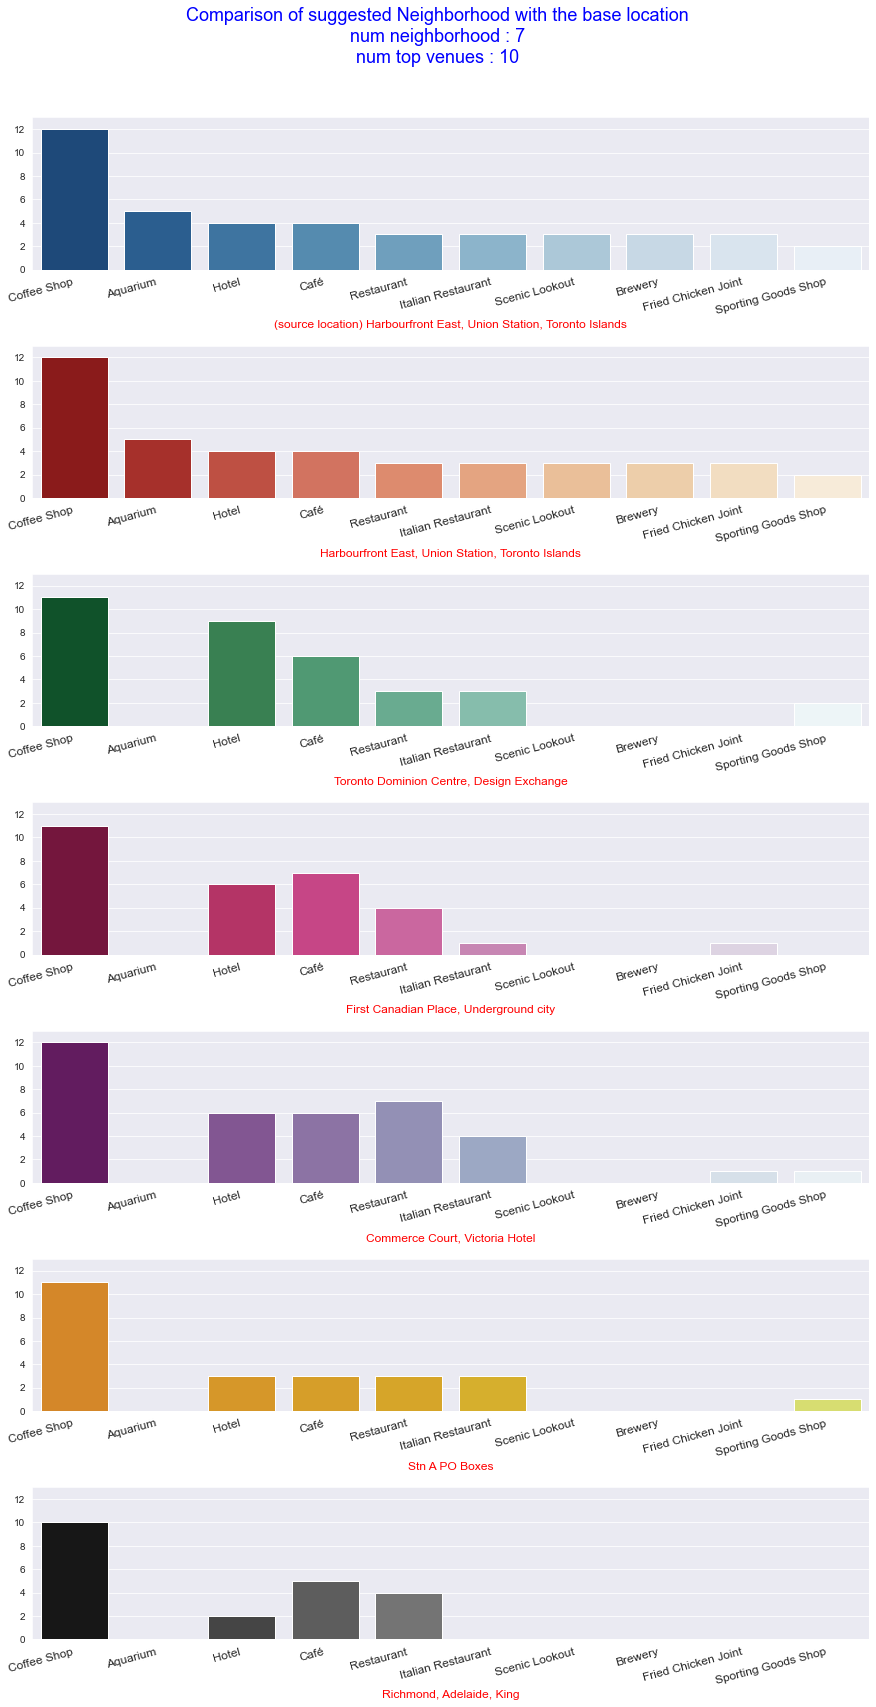

In [66]:
num_venues = 10
num_match = 7

source_name = SOURCE_VENUE
X_match_sorted_named, graph = visualize_venue_match_results_wrapper(X_source=X_source, X_match=X_match,
                                                                    X_meta_mapper=X_meta_mapper,
                                                                    source_name=source_name,
                                                                    colList_features=colList_features,
                                                                    num_match=num_match, num_venues=num_venues)

In [67]:
plot_df = X_match_sorted_named.copy()

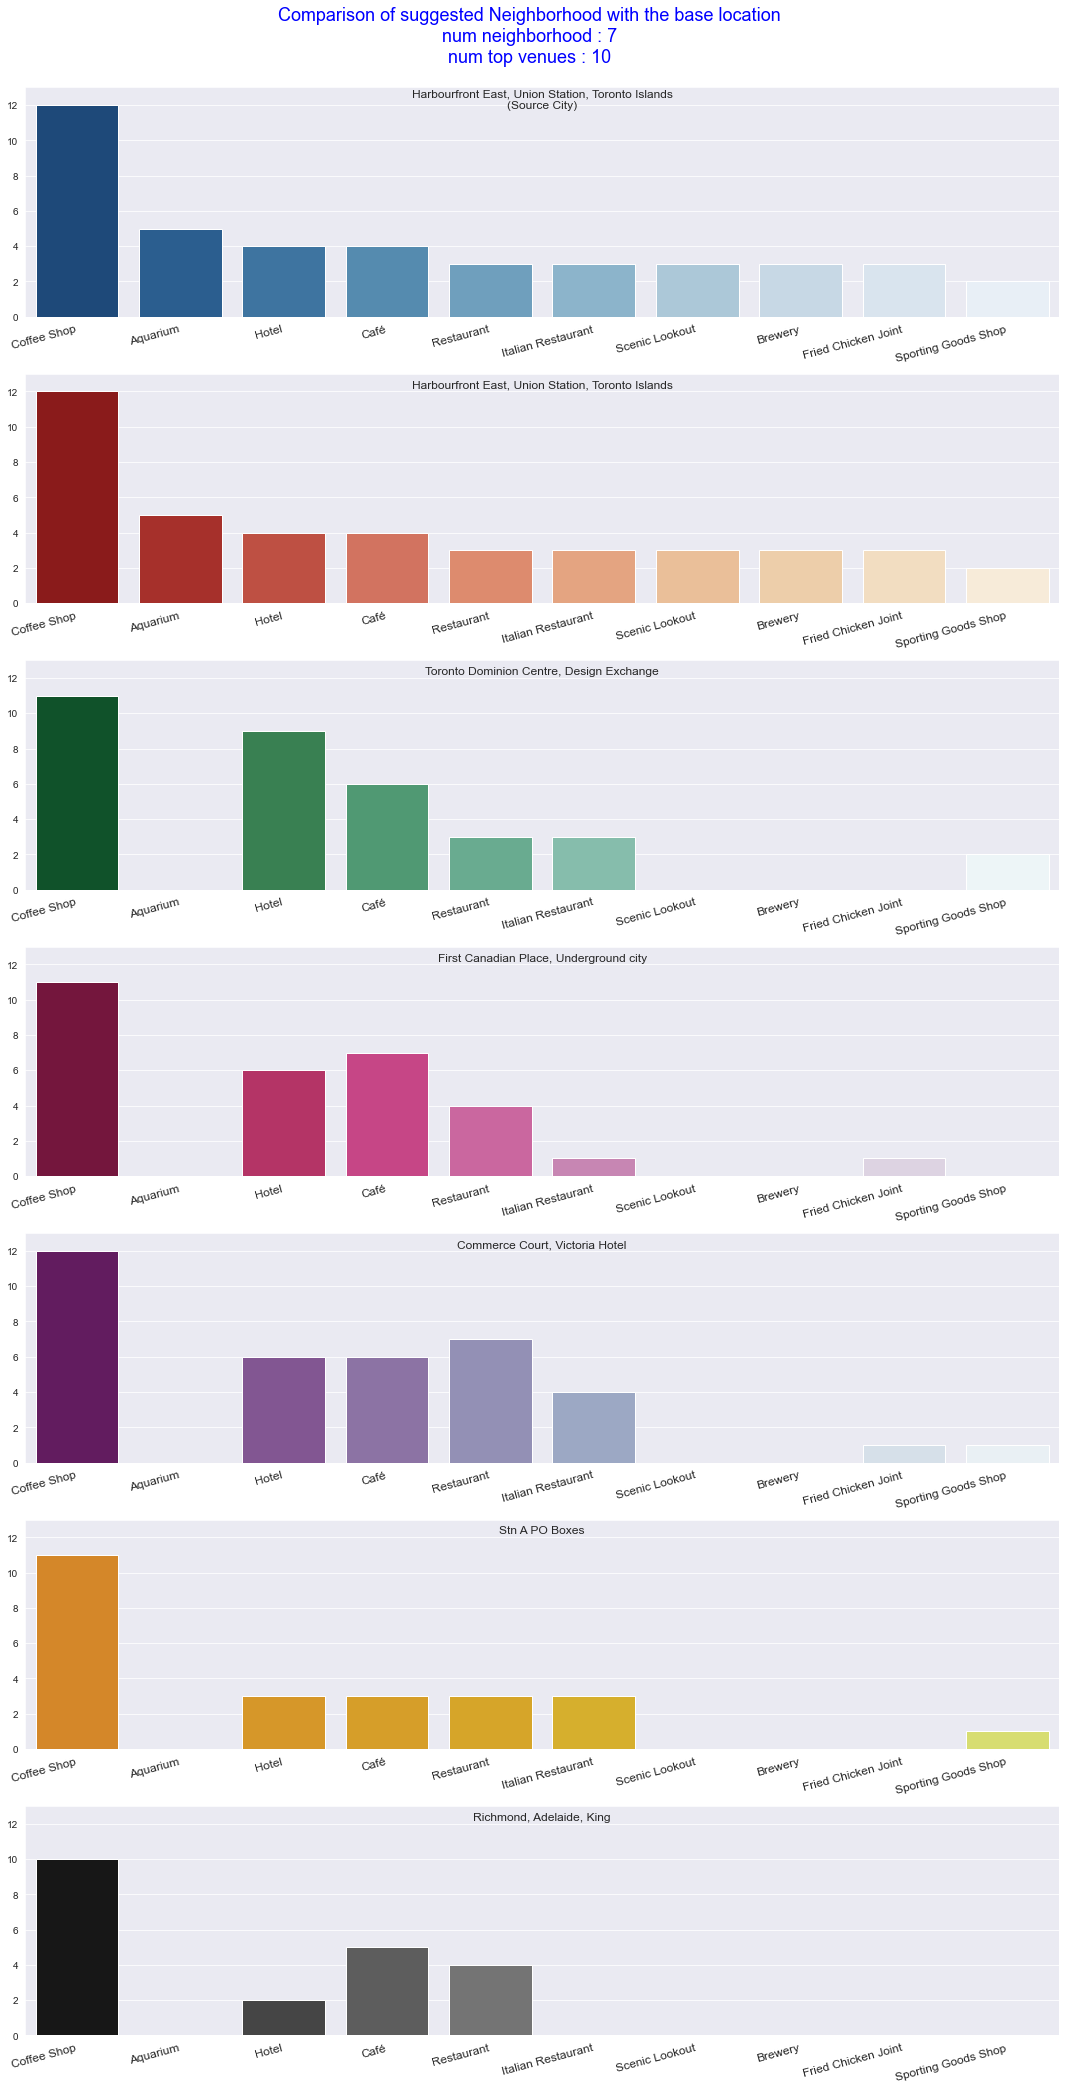

In [68]:
sns.set_style('darkgrid')
fig, axis = plt.subplots(num_match, 1, figsize=(1.5 * num_venues, num_match * 4))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

list_features = [i for i in plot_df.columns if i in colList_features]
list_match = plot_df[col_grain].values
ylim = plot_df[list_features].max().max()

for i_main in range(num_match):
    data_temp = plot_df.loc[i_main][list_features]
    ls_venues = data_temp.index.values
    ls_count = data_temp.values
    ax = axis[i_main]
    sns.barplot(x=ls_venues, y=ls_count, ax=ax, palette=sns.color_palette(list_palette_0[i_main], num_venues, 0.9))

    ax.set_ylabel(ylabel='', fontsize=12, color='red')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim(0, ylim + 1)

    ax.set_xticklabels(ls_venues, rotation=15, horizontalalignment='right', size=12)
    #ax.text((len(ls_venues)-1)//2.5, ylim, list_match[i_main], fontsize=15)
    #ax.text(int(len(ls_venues)*0.4), ylim-1, list_match[i_main], fontsize=15)
    
    if i_main == 0:
        #ax.text(int(len(ls_venues)*0.4), ylim-1, 'Source City\n{}'.format(list_match[i_main]), fontsize=12)
        ax.set_title('{}\n(Source City)'.format(list_match[i_main]), loc='center', pad=-10, fontdict={'verticalalignment': 'center_baseline'})
    else:
        #ax.text(int(len(ls_venues)*0.4), ylim-1, list_match[i_main], fontsize=12)
        ax.set_title('{}'.format(list_match[i_main]), loc='center', pad=-10, fontdict={'verticalalignment': 'center_baseline'})
    
main_label = 'Comparison of suggested Neighborhood with the base location\nnum neighborhood : {}\nnum top venues : {}'.format(
    num_match, num_venues)
fig.text(0.5, 1.02, main_label, ha='center', va='center', rotation='horizontal', size=18, color='blue')

plt.tight_layout()
plt.show()

Moving from:<br>abc

In [69]:
import streamlit as st

In [ ]:
st.selectbox()